In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import date
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import colors

### Create regression data

In [2]:
tfidf_path = '../../data/tfidf_20230115_largest_rel/'

In [3]:
lda_path = '../../data/lda_20230115_largest_rel/'

In [4]:
# fandom_list = [
#  'star_wars_all_media_types',
#  'haikyuu',
#  'hamilton_miranda',
#  'the_walking_dead_&_related_fandoms',
#  'les_miserables_all_media_types',
#  'shakespare_william_works',
#  'hetalia_axis_powers',
#  'kuroko_no_basuke',
#  'bishoujo_senshi_sailor_moon',
#  'sherlock_holmes_&_related_fandoms']

In [5]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
#  'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'les_miserables_all_media_types',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
#  'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
#  'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [8]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_tfidf_merged_chapters_20230115_largest_rel.tsv'), sep = '\t')
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_lda_with_dist_merged_chs_20230115_largest_rel.tsv'), sep ='\t',  quotechar=None, quoting=3)
    del df_lda['index']
#     del df_lda['Chapters']
#     print(sorted(df_tfidf.Kudos.tolist())[0:10])
#     print(sorted(df_lda.Kudos.tolist())[0:10])
    df_lda['UpdateDate'] = df_lda['UpdateDate'].astype('object')
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
  'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language' ,'PublishDate' ,'Rating',\
 'Relationship','Title'  ,'UpdateDate' ,'Words', 'URL', 'Chapters'], how='inner')

    df['fandom_category'] = fandom    

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)
    print(len(df_tfidf[df_tfidf.Kudos == 0]), len(df_lda[df_lda.Kudos == 0]))
#     freq_rel = find_major_rel(df)
#     df['Relationship'] = df['Relationship'].apply(lambda x: first_rel(x))
#     df['Freq_relationship'] = df['Relationship'].apply(lambda x: 1 if x in freq_rel else 0)
#     del df['Relationship']
    df_all.append(df)

4 4
0 0
27 27
1 1
81 81
0 0
0 0
0 0
3 3
0 0
51 51
0 0
1 1
1 1
4 4
4 4
3 3
1 1
28 28
34 34


In [9]:
df_all = pd.concat(df_all)

In [10]:
len(df_all)

82966

In [11]:
df_all.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'Chapters', 'Characters', 'Fandoms', 'Hits', 'Kudos',
       'Language', 'Rating', 'Relationship', 'Title', 'Words',
       'PublishDate', 'UpdateDate', 'CompleteDate', 'Comments', 'URL',
       'Cos', 'Dist', 'JSD', 'fandom_category'], dtype=object)

In [12]:
df_all.head(2)

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,Kudos,...,Words,PublishDate,UpdateDate,CompleteDate,Comments,URL,Cos,Dist,JSD,fandom_category
0,"BDSM, Bloodplay, Knifeplay, Breathplay, Violen...",Major Character Death,literaryspell,0,M/M,1,"Harry Potter, Draco Malfoy",['Harry Potter - J. K. Rowling'],1013.0,22.0,...,2377.0,2009-12-28,NaN,2009-12-28,4,http://archiveofourown.org/works/246326?view_a...,0.203293,"[8.685443e-06, 8.685443e-06, 8.685443e-06, 8.6...",0.153826,harry_potter
1,"Background Cannibalism, Character Death, Slash...",No Archive Warnings Apply,Catsintheattic,5,M/M,1,"Draco Malfoy, Harry Potter, Original Character...",['Harry Potter - J. K. Rowling'],540.0,14.0,...,23548.0,2009-12-05,NaN,2009-12-05,0,http://archiveofourown.org/works/712532,0.218885,"[9.478433e-07, 9.478433e-07, 9.478433e-07, 9.4...",0.133966,harry_potter


In [13]:
len(set(df_all.Author.tolist()))

26847

In [14]:
len(df_all[df_all.Kudos == 0])

241

In [15]:
sorted(df_all.Kudos.tolist())[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [16]:
del df_all['Language']
del df_all['Title']
del df_all['AdditionalTags']
del df_all['Fandoms']
del df_all['Characters']

In [17]:
len(df_all)

82966

In [18]:
df_all['Category'].fillna('Unknown', inplace=True)
df_all['Category_F_F'] = df_all['Category'].apply(lambda x: 1 if 'F/F' in x else 0)
df_all['Category_F_M'] = df_all['Category'].apply(lambda x: 1 if 'F/M' in x else 0)
df_all['Category_Gen'] = df_all['Category'].apply(lambda x: 1 if 'Gen' in x else 0)
df_all['Category_M_M'] = df_all['Category'].apply(lambda x: 1 if 'M/M' in x else 0)
df_all['Category_Multi'] = df_all['Category'].apply(lambda x: 1 if 'Multi' in x else 0)
df_all['Category_Other'] = df_all['Category'].apply(lambda x: 1 if 'Other' in x else 0)
df_all['Category_Unknown'] = df_all['Category'].apply(lambda x: 1 if 'Unknown' in x else 0)
del df_all['Category']

In [19]:
df_all['ArchiveWarnings_underage'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Underage' in x else 0)
df_all['ArchiveWarnings_death'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Major Character Death' in x else 0)
df_all['ArchiveWarnings_choose_no'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Creator Chose Not To Use Archive Warnings' in x else 0)
df_all['ArchiveWarnings_no_apply'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'No Archive Warnings Apply' in x else 0)
df_all['ArchiveWarnings_violence'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Graphic Depictions Of Violence' in x else 0)
df_all['ArchiveWarnings_noncon'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Rape/Non-Con' in x else 0)

del df_all['ArchiveWarnings']

In [20]:
# df_all = df_all[df_all['ArchiveWarnings_blood'] != 1]
# df_all = df_all[df_all['ArchiveWarnings_none'] != 1]

In [21]:
df_all['Author'].fillna('Unknown', inplace=True)
counts = df_all['Author'].value_counts()
idx = counts[counts >= 10].index
df_all['author_fic_cnt'] = df_all['Author'].apply(lambda x: counts[x])
del df_all['Author']

In [24]:
df_all['Rating_E'] = df_all['Rating'].apply(lambda x: 1 if x == 'Explicit' else 0)
df_all['Rating_G'] = df_all['Rating'].apply(lambda x: 1 if x == 'General Audiences' else 0)
df_all['Rating_M'] = df_all['Rating'].apply(lambda x: 1 if x == 'Mature' else 0)
df_all['Rating_N'] = df_all['Rating'].apply(lambda x: 1 if x == 'Not Rated' else 0)
df_all['Rating_T'] = df_all['Rating'].apply(lambda x: 1 if x == 'Teen And Up Audiences' else 0)
del df_all['Rating']

In [25]:
df_all['Fandom_harry_potter'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'harry_potter' else 0)
df_all['Fandom_dcu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dcu' else 0)
df_all['Fandom_doctor_who'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'doctor_who_&_related_fandoms' else 0)
df_all['Fandom_star_wars'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'star_wars_all_media_types' else 0)
df_all['Fandom_arthurian'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'arthurian_mythology_&_related_fandoms' else 0)
df_all['Fandom_supernatural'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'supernatural' else 0)
df_all['Fandom_haikyuu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'haikyuu' else 0)
df_all['Fandom_kuroko_no_basuke'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'kuroko_no_basuke' else 0)
df_all['Fandom_hamilton_miranda'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hamilton_miranda' else 0)
df_all['Fandom_dragon_age'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dragon_age_all_media_types' else 0)
df_all['Fandom_the_walking_dead'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'the_walking_dead_&_related_fandoms' else 0)
df_all['Fandom_buffy'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'buffy_the_vampire_slayer' else 0)
df_all['Fandom_les_miserables'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'les_miserables_all_media_types' else 0)
df_all['Fandom_naruto'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'naruto' else 0)
df_all['Fandom_tolkien'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'tolkien_j_r_r_works_&_related_fandoms' else 0)
df_all['Fandom_shakespare'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'shakespare_william_works' else 0)
df_all['Fandom_hetalia'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hetalia_axis_powers' else 0)
df_all['Fandom_attack_on_titan'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'attack_on_titan' else 0)
df_all['Fandom_ms_paint_adventures'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'ms_paint_adventures' else 0)
df_all['Fandom_marvel'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'marvel' else 0)
df_all['Fandom_sailor_moon'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'bishoujo_senshi_sailor_moon' else 0)
df_all['Fandom_one_direction'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'one_direction' else 0)
df_all['Fandom_sherlock'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'sherlock_holmes_&_related_fandoms' else 0)

del df_all['fandom_category']

In [26]:
def date_today(cell):
    try:
        y, m, d = cell.split('-')
        return abs(date.today() - date(int(y), int(m), int(d))).days
    except:
        return float('nan')

In [27]:
df_all['PublishDate'] = df_all.apply(lambda row: date_today(row['PublishDate']), axis = 1)
df_all['CompleteDate'] = df_all.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
df_all['UpdateDate'] = df_all.apply(lambda row: date_today(row['UpdateDate']), axis = 1)

In [28]:
def find_history(field_list):
    field_list = [10000000 if np.isnan(x) else x for x in field_list]
    return np.amin(field_list)

In [29]:
df_all['history'] = df_all.apply(lambda row: find_history([row['PublishDate'], row['CompleteDate'], row['UpdateDate']]), axis=1)

In [30]:
del df_all['PublishDate']
del df_all['CompleteDate']
del df_all['UpdateDate']

In [31]:
len(df_all)

82966

In [32]:
# df_t = df_all.sample(100)
# for col in df_t.columns.values:
#     print(col)
#     print(df_t[col].tolist())
#     print()

In [33]:
# df1 = df_all[df_all.isnull().any(axis=1)]

In [34]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Relationship', 'Words',
       'Comments', 'URL', 'Cos', 'Dist', 'JSD', 'Category_F_F',
       'Category_F_M', 'Category_Gen', 'Category_M_M', 'Category_Multi',
       'Category_Other', 'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marve

In [35]:
df_all = df_all.rename(columns = {'history':'History', 'Cos': 'Term_novelty', 'JSD': 'Topic_novelty'})

In [36]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Relationship', 'Words',
       'Comments', 'URL', 'Term_novelty', 'Dist', 'Topic_novelty',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_

In [37]:
df_all.head()

,Bookmarks,Chapters,Hits,Kudos,Relationship,Words,Comments,URL,Term_novelty,Dist,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,0,1,1013.0,22.0,Draco Malfoy/Harry Potter,2377.0,4,http://archiveofourown.org/works/246326?view_a...,0.203293,"[8.685443e-06, 8.685443e-06, 8.685443e-06, 8.6...",...,0,0,0,0,0,0,0,0,0,4767.0
1,5,1,540.0,14.0,Draco Malfoy/Harry Potter,23548.0,0,http://archiveofourown.org/works/712532,0.218885,"[9.478433e-07, 9.478433e-07, 9.478433e-07, 9.4...",...,0,0,0,0,0,0,0,0,0,4790.0
2,3,1,495.0,22.0,Draco Malfoy/Harry Potter,770.0,0,http://archiveofourown.org/works/176932,0.326033,"[2.9789806e-05, 2.9789806e-05, 2.9789806e-05, ...",...,0,0,0,0,0,0,0,0,0,4769.0
3,8,1,1522.0,73.0,Draco Malfoy/Harry Potter,16009.0,3,http://archiveofourown.org/works/560543?view_a...,0.171888,"[1.347676e-06, 1.347676e-06, 1.347676e-06, 1.3...",...,0,0,0,0,0,0,0,0,0,4780.0
4,0,1,319.0,9.0,Draco Malfoy/Harry Potter,824.0,0,http://archiveofourown.org/works/35575,0.303424,"[2.8527349e-05, 2.8527349e-05, 2.8527349e-05, ...",...,0,0,0,0,0,0,0,0,0,4773.0


In [38]:
df_all.to_csv('../../data/fanfic_regression_data_20210915_largest_rel.tsv', sep = '\t', index=False)

### Correlations

In [42]:
# df_all = pd.read_csv('../../data/fanfic_regression_data_20210915_no_crossover.tsv', sep = '\t')

In [39]:
df_all = df_all.rename(columns = {'author_fic_cnt':'Author work count',\
                                  'Term_novelty': 'Term novelty', 'Topic_novelty':'Topic novelty', 'History': 'Age'})

In [41]:
term_ave = np.average(df_all['Term novelty'])
topic_ave = np.average(df_all['Topic novelty'])
df_all['Term novelty cent'] = df_all['Term novelty'] - term_ave
df_all['Topic novelty cent'] = df_all['Topic novelty'] - topic_ave
df_all['Term novelty squared'] = np.square(df_all['Term novelty cent'])
df_all['Topic novelty squared'] = np.square(df_all['Topic novelty cent'])

In [42]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Relationship', 'Words',
       'Comments', 'URL', 'Term novelty', 'Dist', 'Topic novelty',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'Author work count', 'Rating_E', 'Rating_G', 'Rating_M',
       'Rating_N', 'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_pai

In [43]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Author work count',\
               'Term novelty', 'Topic novelty', 'Term novelty squared', 'Topic novelty squared','Age']].corr()

In [44]:
# corr = df_all[['Chapters',
#        'Term novelty', 'Topic novelty', 'Freq_relationship',
#        'Category_F_M', 'Category_Gen', 'Category_M_M', 'Category_Multi',
#        'Category_Other', 'Category_Unknown', 'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'Author fiction count', 'Rating_E', 'Rating_G',
#        'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'Age', 'Words']].corr()

In [45]:
w,v = np.linalg.eig(corr)  

In [46]:
for idx, item in enumerate(corr.columns.values):
    print(item, np.sqrt(max(w)/w[idx]))


Kudos 1.0
Bookmarks 1.315942045078602
Comments 1.6449337060196862
Hits 1.7067540571502875
Chapters 1.8044559717072646
Author work count 1.9413563372951639
Term novelty 5.286009577188032
Topic novelty 2.412383370586709
Term novelty squared 2.5786021859541375
Topic novelty squared 3.1994540086552234
Age 3.428067103498258


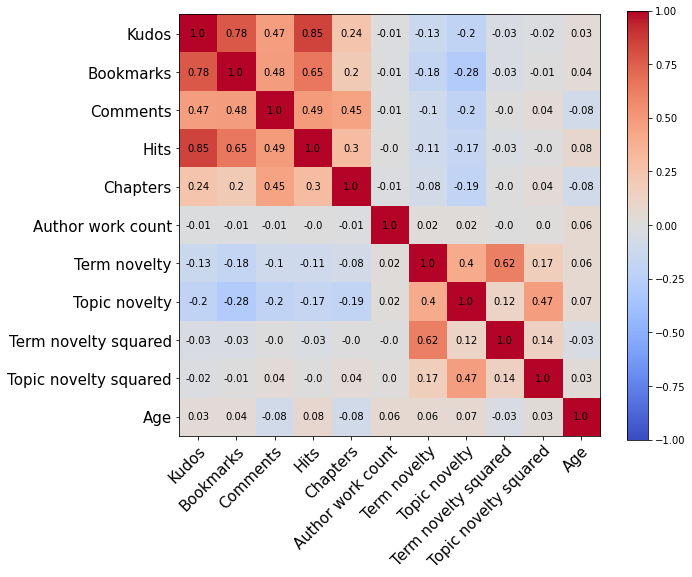

In [47]:
labels = corr.columns.values
fig, ax = plt.subplots(figsize = (10,10))

# kmin = np.amin(corr.as_matrix())
# kmax = np.amax(corr.as_matrix())

norm = colors.Normalize(vmin = -1, vmax = 1)
im = ax.imshow(corr, norm=norm,cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize='15')

plt.setp(ax.get_yticklabels(), fontsize='15')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(corr.values[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("")
fig.colorbar(im, shrink=0.7)
fig.tight_layout()
# plt.savefig('variables_corr_merged_chs_20210915.pdf', format='pdf')